In [ ]:
!pip install python-bitcoinlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 5.9 MB/s eta 0:00:00


In [ ]:
import os
from bitcoin import *
from bitcoin.wallet import CBitcoinSecret, P2PKHBitcoinAddress
from bitcoin.core import COIN, CMutableTransaction, CMutableTxOut, CMutableTxIn, COutPoint, lx, Hash160
from bitcoin.core.script import SignatureHash, SIGHASH_ALL
from bitcoin.core.script import CScript, OP_DUP, OP_HASH160, OP_EQUALVERIFY, OP_CHECKSIG
import requests

In [ ]:
# Tạo khoá riêng, khoá công khai, địa chỉ P2PKH
def generate_keypair():
  # Chọn tham số cho Testnet
  bitcoin.SelectParams('testnet')

  # Tạo khóa riêng và khóa công khai
  private_key = CBitcoinSecret.from_secret_bytes(os.urandom(32))
  public_key = private_key.pub

  # Tạo địa chỉ P2PKH
  address = P2PKHBitcoinAddress.from_pubkey(public_key)

  return private_key, public_key, address


In [ ]:
#Khoá quỹ với testnet BTC đã nhận từ Bitcoin Faucet
def scriptPubKey(public_key):
  public_key_hash = Hash160(public_key)
  script_pubkey = CScript([OP_DUP, OP_HASH160, public_key_hash, OP_EQUALVERIFY, OP_CHECKSIG])
  return script_pubkey

In [ ]:
# Tạo giao dịch
def create_transaction(private_key, public_key, script_pubkey, destination_address, txid, output_index, amount_to_send):
    # Tạo một đầu vào giao dịch
    txin = CMutableTxIn(COutPoint(lx(txid), output_index))

    # Tạo một đầu ra giao dịch tới địa chỉ đích
    txout = CMutableTxOut(amount_to_send, destination_address)

    # Tạo giao dịch
    tx = CMutableTransaction([txin], [txout])

    # Ký giao dịch
    sighash = SignatureHash(script_pubkey, tx, 0, SIGHASH_ALL)
    signature = private_key.sign(sighash) + bytes([SIGHASH_ALL])

    # Tạo scriptSig để đính kèm chữ ký và khóa công khai
    txin.scriptSig = CScript([signature] + [public_key])

    return tx

In [ ]:
# Phát sóng giao dịch
def broadcast_transaction(tx):
    url = "https://blockstream.info/testnet/api/tx"  # API Testnet
    headers = {'Content-Type': 'text/plain'}

    # Chuyển đổi Transaction ID thành chuỗi hex
    tx_hex = tx.serialize().hex()

    try:
        # Gửi yêu cầu HTTP POST để phát sóng giao dịch
        response = requests.post(url, data=tx_hex, headers=headers)

        # Xử lý kết quả trả về
        if response.status_code == 200:
            print("Giao dịch đã được phát sóng, TXID:", response.text)
            return response.text  # Trả về TXID
        else:
            print("Lỗi API:", response.text)
            return None
    except Exception as e:
        print("Lỗi kết nối API:", str(e))
        return None

In [ ]:
# Tạo cặp khóa riêng và công khai của người gửi
private_key_sender, public_key_sender, address_sender = generate_keypair()
# In kết quả
print("Private Key của người gửi :", private_key_sender)
print("Public Key của người gửi:", public_key_sender.hex())
print("Testnet Address:", address_sender)


Private Key của người gửi : cSS5thQRvuc7JkwLYTJuquaLg1GYZLzfo2ZGi5spp5ygW3JtPA6y
Public Key của người gửi: 034d18b5bbd5c18bd913003ce68e6f729f24030229088a4bc6f7e6b26c36ca84f3
Testnet Address: mpTatPoZoGNJkbjUa5LTPZtRw4jy6spg4C


Sử dụng faucet bitcoin(https://coinfaucet.eu/en/btc-testnet/) để gửi testnet BTC đến địa chỉ testnet vừa tạo

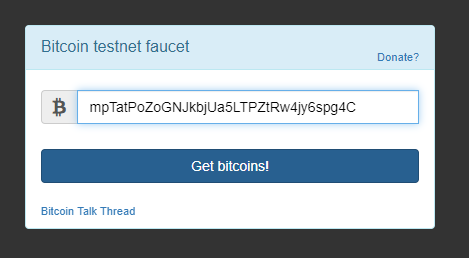

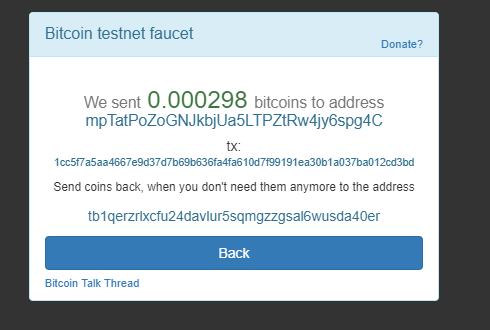

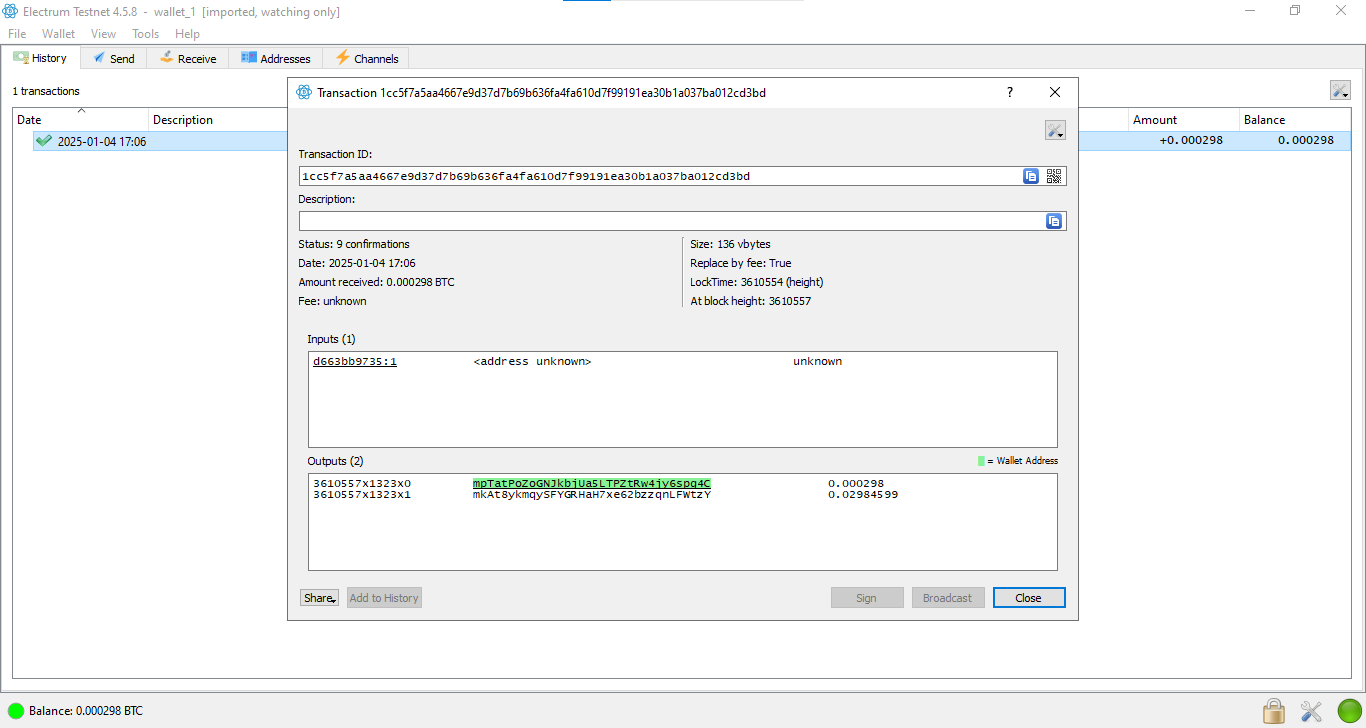

In [ ]:
#Tạo ScriptPubKey để khóa quỹ
script_pubkey = scriptPubKey(public_key_sender)
print("ScriptPubKey:", script_pubkey)

ScriptPubKey: b'v\xa9\x14b\x16\x03\x83\x9c\xf9\\\xcaL\xfd\xb8v\x96\x81;0F\xa2H\x17\x88\xac'


In [ ]:
# Tạo ngẫu nhiên Address của người nhận
private_key_receiver, public_key_receiver, address_receiver = generate_keypair()
print("Private key của người nhận:", private_key_receiver)
print("Public key của người nhận:", public_key_receiver.hex())
print("Testnet Address:", address_receiver)


Private key của người nhận: cQQTjSufZ1oi7MBp9qYPNhPhnMCWaCwG2GPThiVh8PYvFVfqjpUt
Public key của người nhận: 03bb0088a183b63518684437eca1dc7c0a74a9a4b65771bb35e8aac1aa8190b937
Testnet Address: n4cFd1EiYSt767CZ9wJu6WXycgpGvJzEQe


In [ ]:
# Khởi tạo các tham số cho giao dịch
txid = input("Nhập TXID của UTXO: ")  # Transaction ID của giao dịch
output_index = int(input("Nhập output index : "))  # Index của UTXO
amount_to_send = int(float(input("Nhập số lượng BTC cần gửi: ")) * COIN)  # Chuyển BTC sang Satoshi

# Tạo giao dịch
tx = create_transaction(private_key_sender, public_key_sender, script_pubkey, address_receiver, txid, output_index, amount_to_send)

Nhập TXID của UTXO: 1cc5f7a5aa4667e9d37d7b69b636fa4fa610d7f99191ea30b1a037ba012cd3bd
Nhập output index : 0
Nhập số lượng BTC cần gửi: 0.00025


In [ ]:
# Phát sóng giao dịch
broadcast_transaction(tx)

Lỗi API: RPC error
